# ADS - Network Analysis Homework

In [1]:
#add necessary libraries
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


## Problem 1
Visualize the network with node labels and sizes proportional to node degree

In [2]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
#first download the data from https://serv.cusp.nyu.edu/files/ADS-2015/NetworkAnalysis/homework1/lesmis.gml
G = nx.read_gml('data/lesmis.gml')

In [9]:
np.array(list(dict(G.degree()).values()))

array([13,  1,  4,  7,  7,  7, 11,  1,  3, 11,  7, 15,  3,  1,  1, 11,  6,
        9,  6,  9,  1, 10,  2,  7,  7,  1,  2,  1, 16,  1,  9,  2,  2,  1,
        4,  6,  3,  1, 11,  3, 36,  1,  6,  1,  4, 10,  2,  1,  2,  7, 13,
        2,  3,  1,  1, 11, 11, 10,  7,  2,  7,  2,  8,  7, 12, 22,  6,  1,
       10,  2, 19,  3, 10, 17,  1, 12, 15])

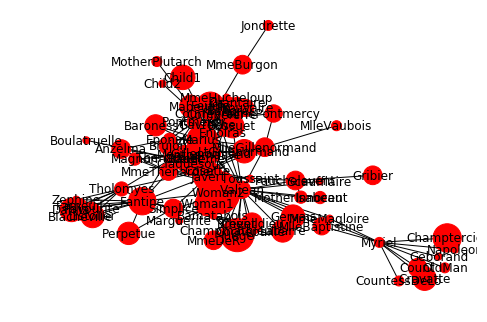

In [10]:
# Code here
np.random.seed(2011)
nx.draw(G,with_labels=True,node_size=50*np.array(list(dict(G.degree()).values())))

## Problem 2
Output the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality;

b) eigenvector centrality;

c) betweenness centrality;

d) closeness centrality;

In [21]:
#compute centrality measures
mc1 = dict(nx.degree(G))

mc2 = nx.eigenvector_centrality(G)

mc3 = nx.betweenness_centrality(G)

mc4 = nx.closeness_centrality(G)

In [26]:
#output top 5 nodes
def topdict(d,tn,mode):
    ind=sorted(d, key=d.get, reverse=True)
    print('Measure: {0}'.format(mode))
    for i in range(0,tn):
       print('{0}|{1} : {2}'.format(i+1,ind[i],d[ind[i]]))
    print("")
    return ind

ind1 = topdict(mc1,5,"degree centrality")
ind2 = topdict(mc2,5,"eigenvector centrality")
ind3 = topdict(mc3,5,"betweenness centrality")
ind4 = topdict(mc4,5,"closeness centrality")

Measure: degree centrality
1|Valjean : 36
2|Gavroche : 22
3|Marius : 19
4|Javert : 17
5|Thenardier : 16

Measure: eigenvector centrality
1|Gavroche : 0.3178389397749769
2|Valjean : 0.2676181759885394
3|Enjolras : 0.26717863282356674
4|Marius : 0.25911114534178764
5|Bossuet : 0.24213078637474142

Measure: betweenness centrality
1|Valjean : 0.5699890527836187
2|Myriel : 0.17684210526315788
3|Gavroche : 0.16511250242584766
4|Marius : 0.132032488621946
5|Fantine : 0.12964454098819422

Measure: closeness centrality
1|Valjean : 0.6440677966101694
2|Marius : 0.5314685314685315
3|Thenardier : 0.5170068027210885
4|Javert : 0.5170068027210885
5|Gavroche : 0.5135135135135135



## Problem 3

Using the world airport dataset

a) Find connected components, report their number and the sizes.

b) In the largest connected component find top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank).

c) Find average network distance of the shortest path between all pairs of the airports from the largest connected component.

d) Find average distance among the top 100 airports by degree, betweenness, closeness, pagerank.

#### a) Find connected components, report their number and the sizes.

In [3]:
# code here
cities = pd.read_csv( 'data/citiesTable.csv' , index_col=0 )
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [20]:
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)

In [5]:
CityPos={c:(cities['long. most active airport'][c],cities['lat. most active airport'][c])
         for c in cities.index}

In [6]:
links = pd.read_csv( 'data/citiesToCities.csv' , index_col=None )
links.head()

,departure city,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
0,Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
1,Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
2,Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
3,Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
4,Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [19]:
EN=len(links.index)
edgelist=[(links['departure city'][j],links['arrival city'][j],int(links['distance'][j])) for j in range(EN)]
edgelist

[('Sao Paulo', 'Rio De Janeiro', 348),
 ('Rio De Janeiro', 'Sao Paulo', 348),
 ('Beijing', 'Shanghai', 1100),
 ('Johannesburg', 'Cape Town', 1299),
 ('Honolulu', 'Tokyo', 6103),
 ('Tokyo', 'Honolulu', 6103),
 ('Tokyo', 'Seoul', 1243),
 ('Seoul', 'Tokyo', 1243),
 ('Tokyo', 'Los Angeles', 8691),
 ('Los Angeles', 'Tokyo', 8691),
 ('Shanghai', 'Beijing', 1100),
 ('Hong Kong', 'Bangkok', 1681),
 ('Bangkok', 'Hong Kong', 1681),
 ('Taipei', 'Shanghai', 685),
 ('Shanghai', 'Taipei', 685),
 ('Cape Town', 'Johannesburg', 1299),
 ('Kigali', 'Entebbe', 357),
 ('Shanghai', 'Hong Kong', 1240),
 ('Hong Kong', 'Shanghai', 1240),
 ('Muscat', 'Abu Dhabi', 352),
 ('New York', 'London', 5512),
 ('Abu Dhabi', 'Muscat', 352),
 ('Shenzhen', 'Shanghai', 1203),
 ('Shanghai', 'Shenzhen', 1203),
 ('Taipei', 'Tokyo', 2212),
 ('Tokyo', 'Taipei', 2212),
 ('Sao Paulo', 'Belo Horizonte', 465),
 ('New York', 'Washington', 337),
 ('Washington', 'New York', 337),
 ('Qingdao', 'Shanghai', 600),
 ('Shanghai', 'Qingdao', 6

In [21]:
Flights.add_weighted_edges_from(edgelist)

In [22]:
cc = [c for c in sorted(nx.connected_components(Flights), key=len, reverse=True)]

In [23]:
print('Number of connected components: {0}'.format(len(cc)))

Number of connected components: 4


In [24]:
print('Size of connected components: {0}'.format([len(x) for x in cc]))

Size of connected components: [2981, 3, 2, 2]


#### b) In the largest connected component find top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank).

In [12]:
# code here
cc1 = dict(nx.degree(nx.subgraph(Flights,cc[0])))

In [13]:
cc2 = nx.betweenness_centrality(nx.subgraph(Flights,cc[0]))

In [14]:
cc3 = nx.closeness_centrality(nx.subgraph(Flights,cc[0]))

In [15]:
cc4 = nx.pagerank(nx.subgraph(Flights,cc[0]),0.85)

In [18]:
r1 = topdict(cc1,10,"degree centrality")
r2 = topdict(cc2,10,"betweenness centrality")
r3 = topdict(cc3,10,"closeness centrality")
r4 = topdict(cc4,10,"pagerank centrality")

Measure: degree centrality
1|London : 311
2|Paris : 267
3|Frankfurt : 232
4|Moscow : 229
5|Amsterdam : 208
6|Atlanta : 208
7|Chicago : 199
8|Beijing : 184
9|Istanbul : 181
10|Dallas-fort Worth : 181

Measure: betweenness centrality
1|London : 0.09076727836638496
2|Anchorage : 0.08216371312591929
3|Paris : 0.07784192121669806
4|Moscow : 0.06103801970289902
5|Chicago : 0.05813492835186725
6|Frankfurt : 0.05452341641775665
7|Seattle : 0.05271958560535118
8|Dubai : 0.04644272199874114
9|Tokyo : 0.0458546447882062
10|Toronto : 0.04531466582661807

Measure: closeness centrality
1|London : 0.42335559028271064
2|Frankfurt : 0.4174838890445503
3|Paris : 0.41637557635880956
4|Amsterdam : 0.4094531464688101
5|New York : 0.40053763440860213
6|Toronto : 0.39632929910892406
7|Los Angeles : 0.39601328903654487
8|Chicago : 0.3927253558249868
9|Dubai : 0.3926218708827404
10|Newark : 0.38964435146443516

Measure: pagerank centrality
1|London : 0.006659290961342687
2|Moscow : 0.006409790102955393
3|Paris

#### c) Find average network distance of the shortest path between all pairs of the airports from the largest connected component.

In [67]:
# code here
sp = [c for c in nx.all_pairs_dijkstra_path_length(nx.subgraph(Flights,cc[0]))]

In [68]:
vals = []
for i in range(len(sp)):
    x = list(sp[i][1].values())
    x.remove(0)
    vals.extend(x)

In [70]:
np.mean(vals)

4889.4825233188267

#### d) Find average distance among the top 100 airports by degree, betweenness, closeness, pagerank.

In [88]:
def get_mean(sp, mode):
    vals = []
    for i in range(len(sp)):
        x = list(sp[i][1].values())
        x.remove(0)
        vals.extend(x)
    print("Top 100 Average for {0}: {1}".format(mode,np.mean(vals)))

In [92]:
degree_100 = sorted(cc1, key=cc1.get, reverse=True)[:100]
betweenness_100 = sorted(cc2, key=cc2.get, reverse=True)[:100]
closeness_100 = sorted(cc3, key=cc3.get, reverse=True)[:100]
pagerank_100 = sorted(cc4, key=cc4.get, reverse=True)[:100]

In [93]:
sp1 = [c for c in nx.all_pairs_dijkstra_path_length(nx.subgraph(Flights,degree_100))]
sp2 = [c for c in nx.all_pairs_dijkstra_path_length(nx.subgraph(Flights,betweenness_100))]
sp3 = [c for c in nx.all_pairs_dijkstra_path_length(nx.subgraph(Flights,closeness_100))]
sp4 = [c for c in nx.all_pairs_dijkstra_path_length(nx.subgraph(Flights,pagerank_100))]

In [94]:
get_mean(sp1,"degree")
get_mean(sp2,"betweenness")
get_mean(sp3,"closeness")
get_mean(sp4,"pagerank")

Top 100 Average for degree: 3956.8024242424244
Top 100 Average for betweenness: 5298.190505050505
Top 100 Average for closeness: 4651.6824242424245
Top 100 Average for pagerank: 4341.98101010101


# End